In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from amb import *
from collections import defaultdict

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

In [2]:
age_palette = get_age_palette()
age_palette['8wk'] = age_palette['2mo']

In [3]:
all_paths = glob.glob(f"Call.DiffComp.CellType.Age/*/stats_*.hdf")
all_paths[:2]

['Call.DiffComp.CellType.Age/Vip_Gaba/stats_raw_Vip_Gaba.hdf',
 'Call.DiffComp.CellType.Age/MRN-VTN-PPN_Pax5_Cdh23_Gaba/stats_raw_MRN-VTN-PPN_Pax5_Cdh23_Gaba.hdf']

In [4]:
all_df = []
for path in all_paths:
    tmpdf = pd.read_hdf(path, key = 'data')
    all_df.append(tmpdf)

In [5]:
to_plot = pd.concat(all_df)
to_plot['Age'] = to_plot.index.map(lambda x: x.split('.')[1])
to_plot['CellType'] = to_plot.index.map(lambda x: x.split('.')[0])
to_plot.head()

,BB,AA,BA,AB,strength,Age,CellType
Vip_Gaba.8wk,1.348232,1.691310,0.556946,0.556946,2.728759,8wk,Vip_Gaba
Vip_Gaba.9mo,1.351580,1.740590,0.533456,0.533456,2.898242,9mo,Vip_Gaba
Vip_Gaba.18mo,1.410618,1.767011,0.492761,0.492761,3.224308,18mo,Vip_Gaba
MRN-VTN-PPN_Pax5_Cdh23_Gaba.8wk,1.369131,1.795417,0.503652,0.503652,3.141598,8wk,MRN-VTN-PPN_Pax5_Cdh23_Gaba
MRN-VTN-PPN_Pax5_Cdh23_Gaba.9mo,1.318844,1.819308,0.505562,0.505562,3.103628,9mo,MRN-VTN-PPN_Pax5_Cdh23_Gaba


## plot by strip

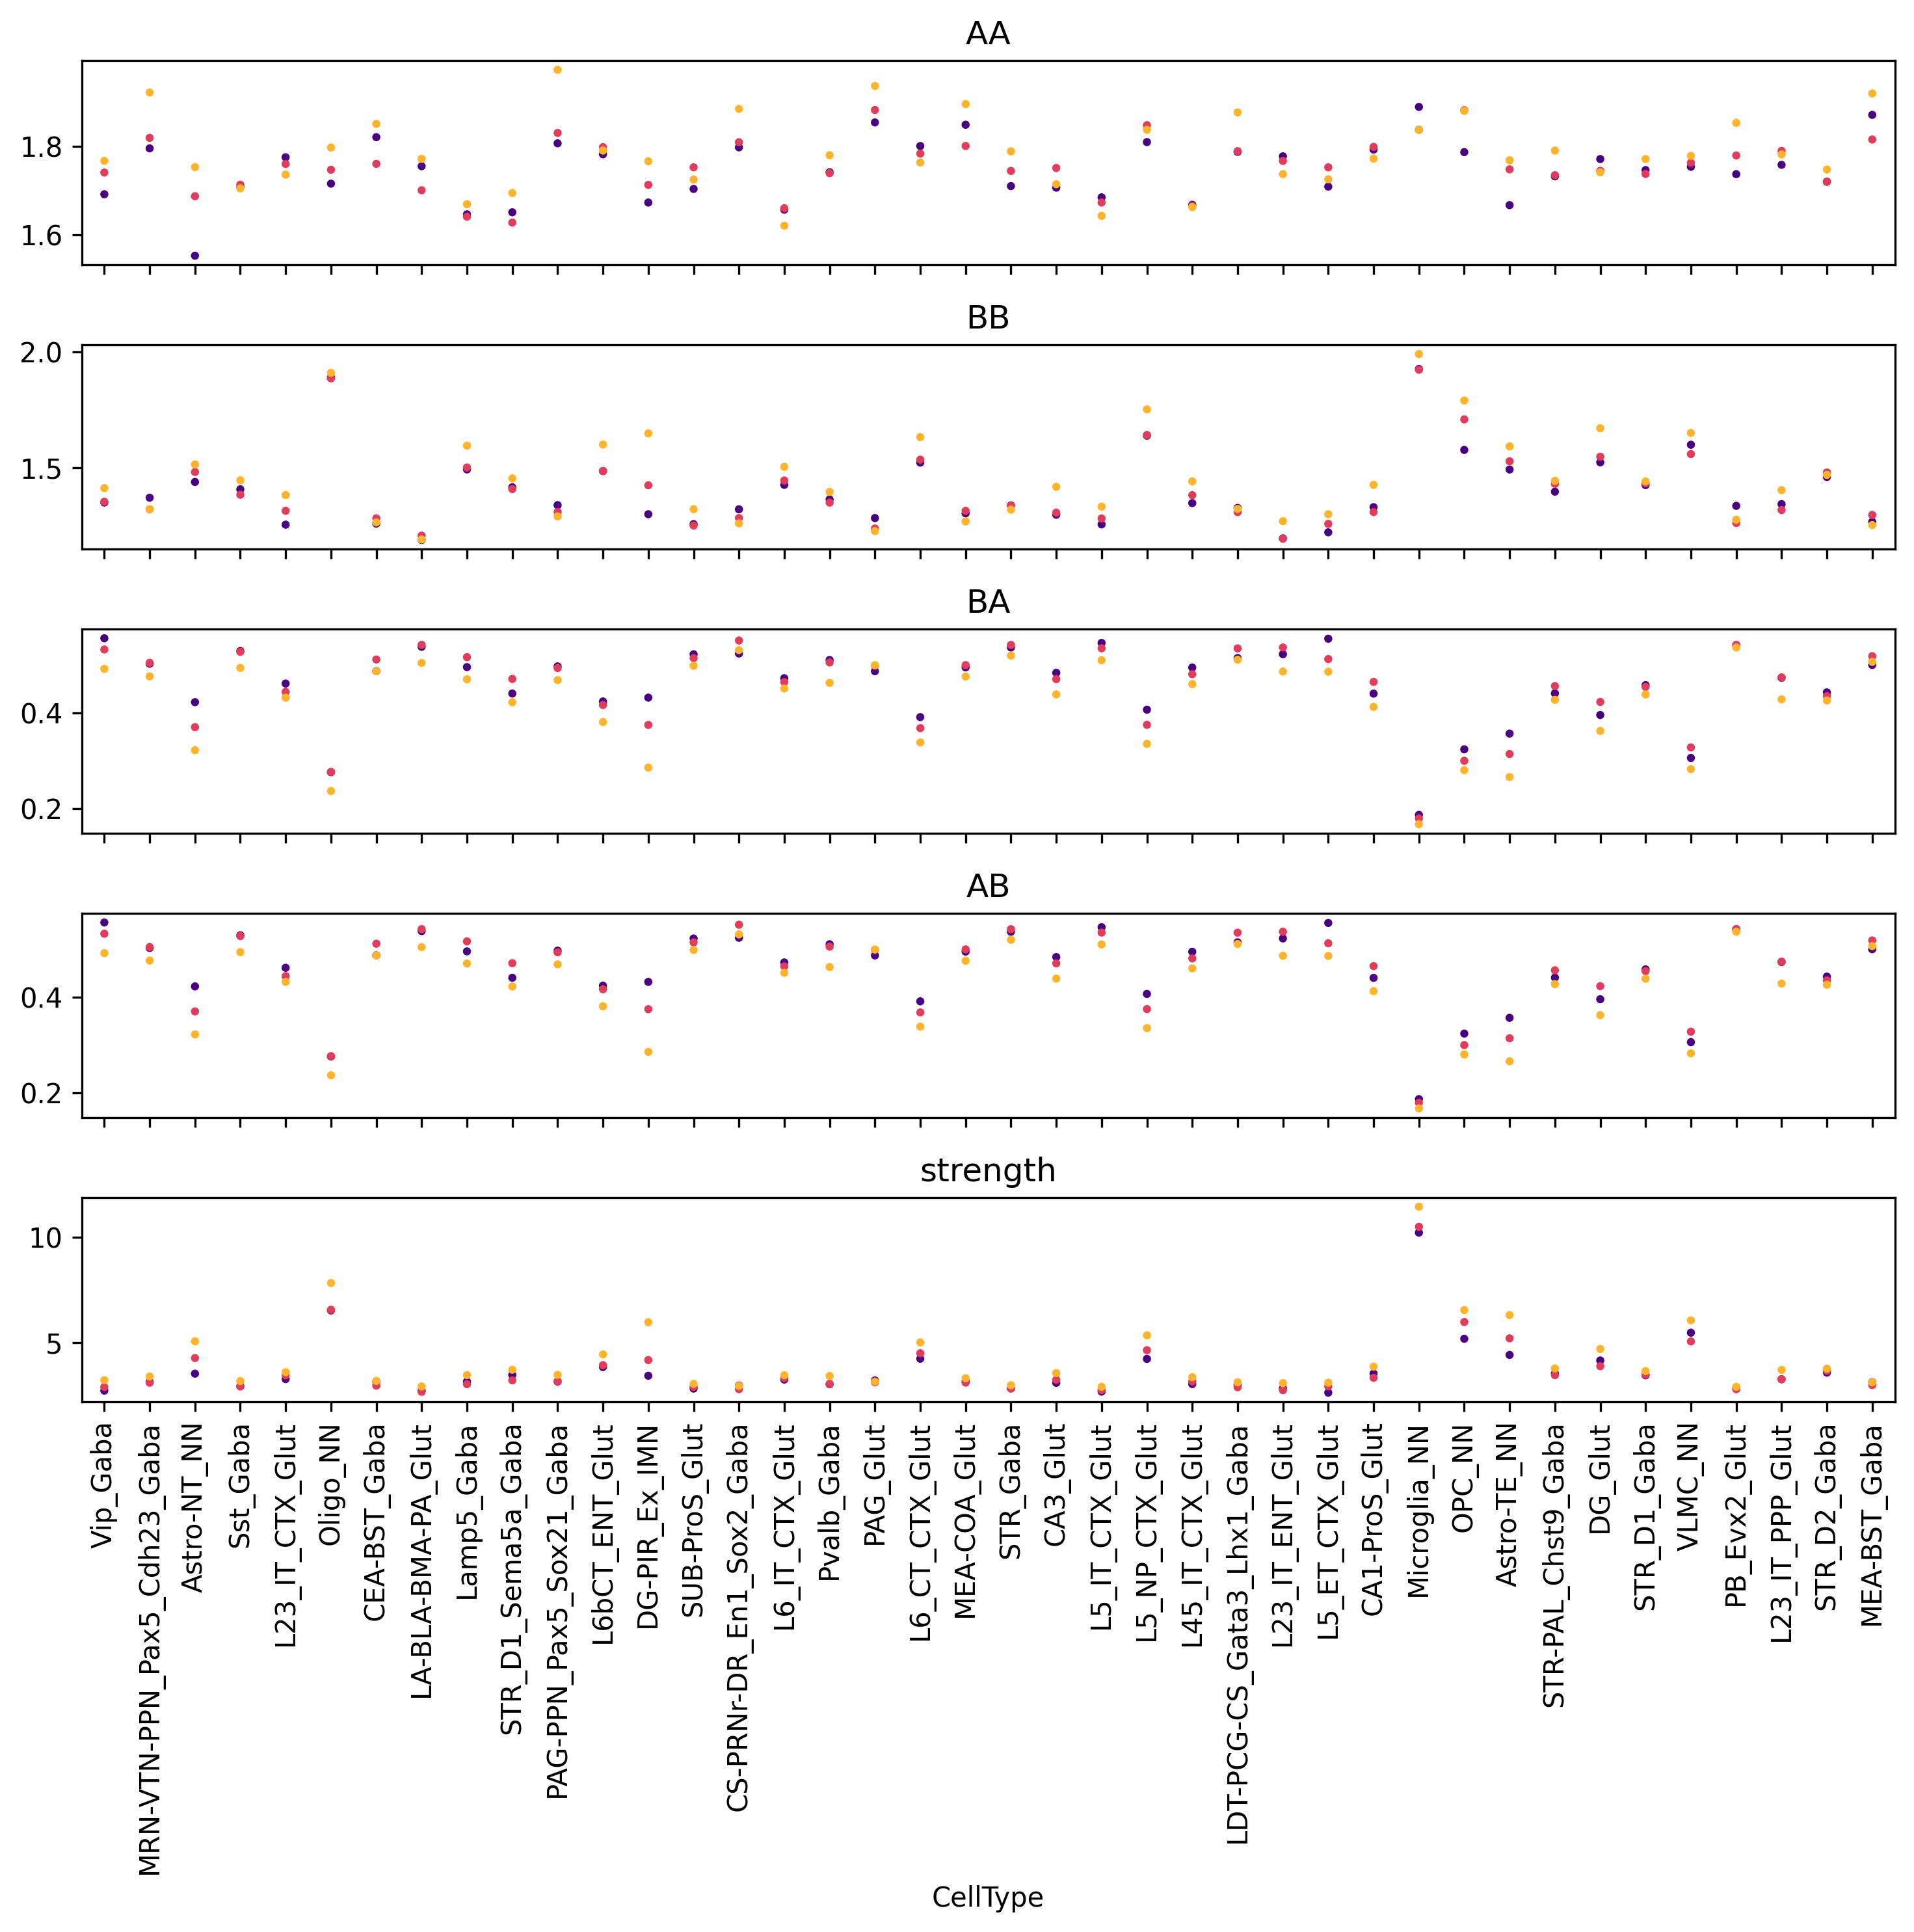

In [6]:
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize=(10, 10), dpi=300, constrained_layout = True, sharex = True)
for i,xx in enumerate(['AA', 'BB', 'BA','AB', 'strength']):
    ax = axes[i]
    sns.stripplot(data=to_plot, x='CellType', y=xx, hue='Age', 
                  jitter=False, hue_order=['8wk','9mo','18mo'], 
                  palette=age_palette, ax=ax, size = 3, legend  = False)
    ax.set_title(xx)
    ax.set_ylabel('')
    # if xx!='strength':
    #     ax.legend([],[], frameon=False)
    # else:
    #     ax.legend(loc='upper left', bbox_to_anchor=(1,1))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
#plt.savefig(f'{indir}plot/stats_strip_{mode}.pdf', transparent=True)


In [7]:
selcted_ct = []
for ct , tmpdf in to_plot.groupby('CellType'):
    mean_df = tmpdf.groupby('Age')['strength'].mean()
    if (mean_df['18mo'] > mean_df['9mo']) & (mean_df['9mo'] > mean_df['8wk']):
        selcted_ct.append(ct)

In [8]:
selected_to_plot = to_plot[to_plot['CellType'].isin(selcted_ct)]

In [9]:
selected_to_plot

,BB,AA,BA,AB,strength,Age,CellType
Vip_Gaba.8wk,1.348232,1.691310,0.556946,0.556946,2.728759,8wk,Vip_Gaba
Vip_Gaba.9mo,1.351580,1.740590,0.533456,0.533456,2.898242,9mo,Vip_Gaba
Vip_Gaba.18mo,1.410618,1.767011,0.492761,0.492761,3.224308,18mo,Vip_Gaba
Astro-NT_NN.8wk,1.437399,1.551943,0.423022,0.423022,3.533320,8wk,Astro-NT_NN
Astro-NT_NN.9mo,1.480649,1.686914,0.370633,0.370633,4.273182,9mo,Astro-NT_NN
...,...,...,...,...,...,...,...
L23_IT_PPP_Glut.9mo,1.315705,1.789655,0.474945,0.474945,3.269177,9mo,L23_IT_PPP_Glut
L23_IT_PPP_Glut.18mo,1.401875,1.781662,0.428928,0.428928,3.711037,18mo,L23_IT_PPP_Glut
STR_D2_Gaba.8wk,1.459127,1.719875,0.443506,0.443506,3.583941,8wk,STR_D2_Gaba
STR_D2_Gaba.9mo,1.478372,1.719709,0.435610,0.435610,3.670808,9mo,STR_D2_Gaba


In [10]:
selected_to_plot['Class'] =selected_to_plot['CellType'].apply(lambda x: x.split('_')[-1])

In [11]:
glut_to_plot = selected_to_plot[selected_to_plot['Class'] == 'Glut']
gaba_to_plot = selected_to_plot[selected_to_plot['Class'] == 'Gaba']
nn_to_plot = selected_to_plot[selected_to_plot['Class'] == 'NN']

In [12]:
for _class in ['Glut','Gaba','NN']:
    tmp_to_plot = selected_to_plot[selected_to_plot['Class'] == _class]
    fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize=(5, 8), dpi=300, constrained_layout = True, sharex = True)
    for i,xx in enumerate(['AA', 'BB', 'BA','AB', 'strength']):
        ax = axes[i]
        sns.stripplot(data=tmp_to_plot, x='CellType', y=xx, hue='Age', 
                      jitter=True, hue_order=['8wk','9mo','18mo'], 
                      palette=age_palette, ax=ax, size = 4, legend  = False)
        ax.set_title(xx, fontsize = 9)
        ax.set_ylabel('')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.savefig(f'figure/stats_strip_{_class}.pdf', transparent=True)
    plt.close()


## plot by heatmap

In [13]:
selcted_ct = []
for ct , tmpdf in to_plot.groupby('CellType'):
    mean_df = tmpdf.groupby('Age')['strength'].mean()
    if (mean_df['18mo'] > mean_df['9mo']) & (mean_df['9mo'] > mean_df['8wk']):
        selcted_ct.append(ct)
len(selcted_ct)

23

In [14]:
#celltype_order = ['Astro_NN','OPC_NN']
celltype_order = selcted_ct
sample_postfix   = ['8wk','9mo','18mo']


In [15]:
plot_col ='strength'
to_plot_dict = defaultdict(list)
for ct in celltype_order:
    for sample in sample_postfix:
        to_plot_dict[ct].append(to_plot.loc[f'{ct}.{sample}'][plot_col])

In [16]:
from scipy.stats import zscore


In [17]:
celltype_order = ['Astro-NT_NN','Astro-TE_NN', 'OPC_NN', 'Oligo_NN', 'Microglia_NN',
                  'L5_ET_CTX_Glut', 'L5_IT_CTX_Glut', 'SUB-ProS_Glut',
                  'L23_IT_CTX_Glut','L45_IT_CTX_Glut','L5_NP_CTX_Glut',
                  'L6_IT_CTX_Glut', 'L6bCT_ENT_Glut',  'L6_CT_CTX_Glut',
                  'CA3_Glut','L23_IT_PPP_Glut','DG-PIR_Ex_IMN', 
                  'Pvalb_Gaba',  'Vip_Gaba',  'PAG-PPN_Pax5_Sox21_Gaba',
                  'STR_D1_Gaba', 'STR_D2_Gaba', 'STR_Gaba',     
                  ]

In [18]:
all_plt_cols = ['strength', 'BB', 'AA', 'BA', 'AB']

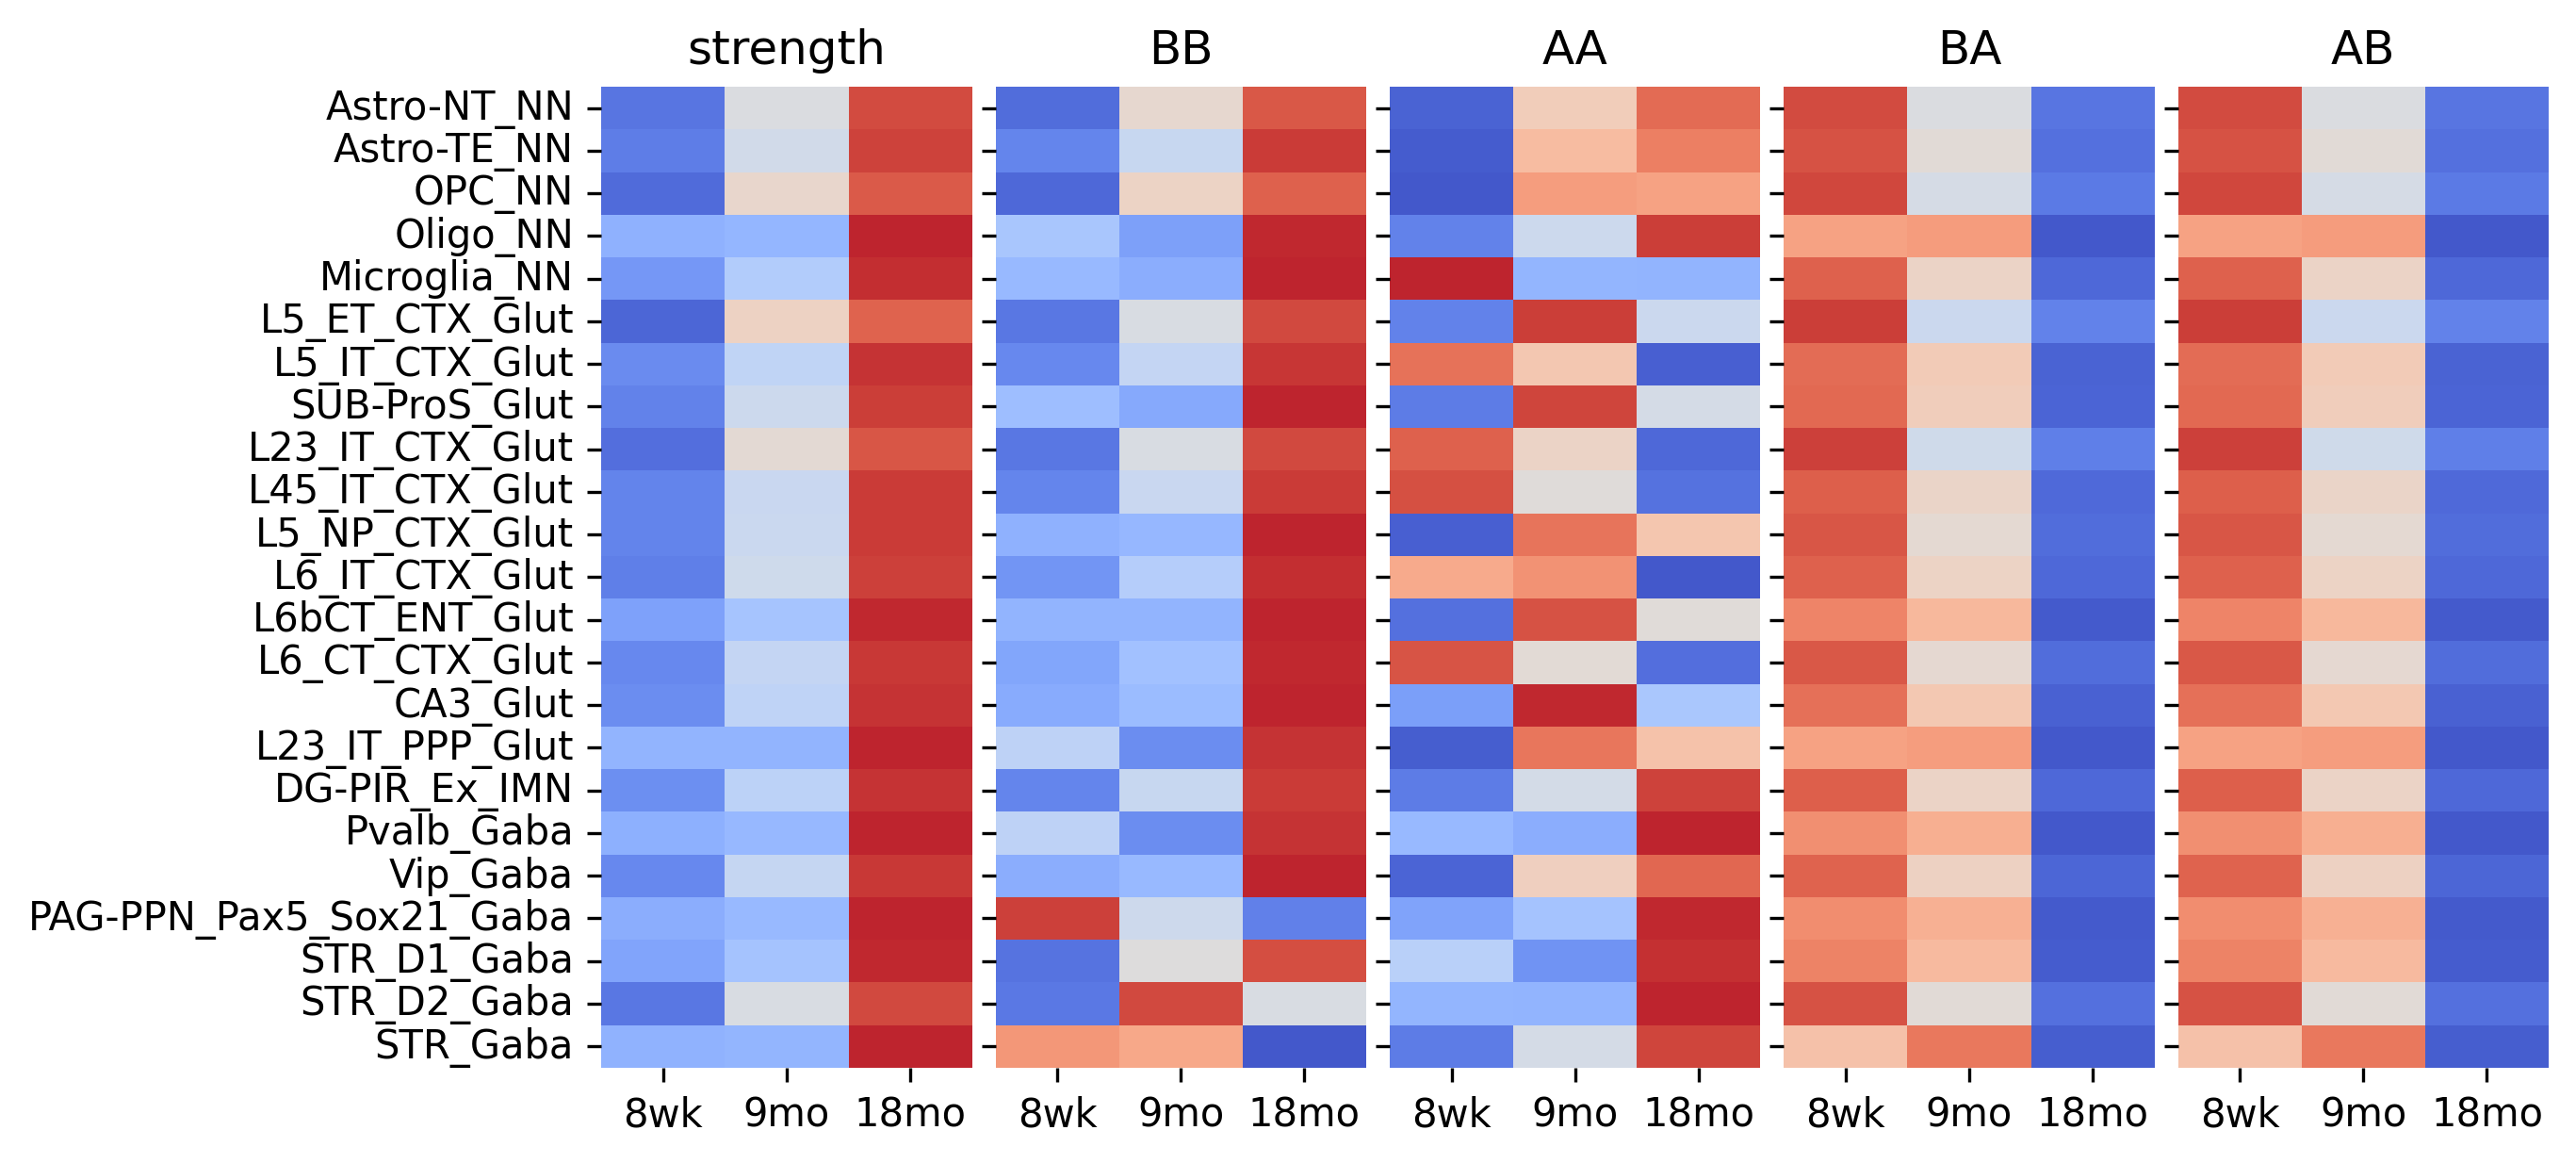

In [19]:
fig, axes= plt.subplots(figsize = (9,4), ncols = 5, dpi = 300, sharey = True, constrained_layout = True)

for plot_col , ax in zip(all_plt_cols, axes.ravel()):
    to_plot_dict = defaultdict(list)
    for ct in celltype_order:
        for sample in sample_postfix:
            to_plot_dict[ct].append(to_plot.loc[f'{ct}.{sample}'][plot_col])
    heatmap_to_plot = pd.DataFrame(to_plot_dict, index = sample_postfix).T
    heatmap_to_plot_normalized = heatmap_to_plot.apply(zscore, axis = 1)
    heatmap_to_plot_normalized = heatmap_to_plot_normalized.loc[celltype_order]
    
    sns.heatmap(heatmap_to_plot_normalized,
                #rasterized = True,
                ax = ax,
                cmap='coolwarm',
                xticklabels=True,
                yticklabels=True,
                vmin=-1.5,vmax=1.5,
                cbar=False,
                rasterized = True
                )
    ax.set_title(plot_col)
fig.savefig(f"figure/compartment_strength.pdf", dpi = 300)

## plot example celltype

In [20]:
example_ct = 'Oligo_NN'

In [21]:
selected_to_plot = to_plot[to_plot['CellType']==example_ct]

Text(0.5, 0.98, 'Oligo_NN')

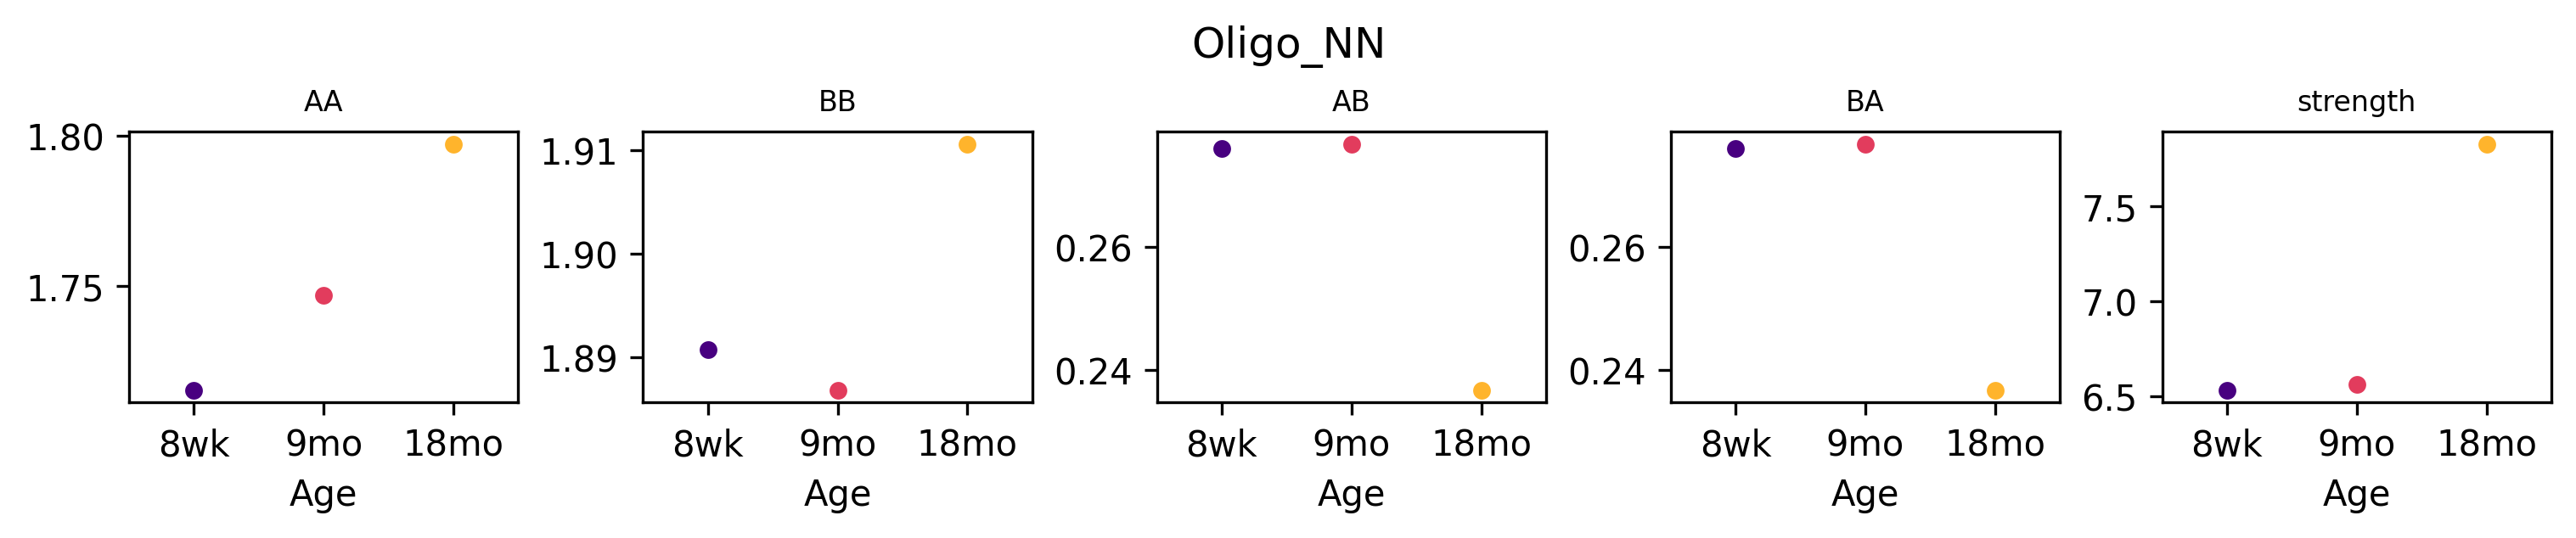

In [22]:
fig, axes = plt.subplots(figsize= (10,2), ncols = 5, dpi=300,sharex='all', constrained_layout = True)
for category, ax in zip(['AA', 'BB', 'AB','BA', 'strength'],axes.ravel()):
    sns.stripplot(data=selected_to_plot, 
                  jitter=False,
                  x="Age", y=category, 
                  palette=age_palette,
                  hue="Age",legend = False,
                  order = ['8wk','9mo','18mo'],
                  ax = ax)
    ax.set_title(f'{category}', fontsize=8)
    ax.set_ylabel('')

plt.suptitle(f'{example_ct}', fontsize=12) 
#plt.savefig(f'figure/stats_strip_{example_ct}.pdf', transparent=True)